In [8]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [9]:
df = pd.read_csv("./data/archivo_limpio.csv")
df.head()

,sequential_id,gender,treatment,date_time,country,birth_date,email,total_reservations,average_stay,average_advance_booking,reservation_channel,travel_reason,last_reservation,different_hotels,companion,billing,language_name,age
0,32.943,mujer,Señora,2024-04-27,MX,1976-01-02,True,1.0,1.0,0,Indirecto,LEISURE,2024-04-27,1.0,Pareja,118.90,Spanish,48.0
1,4.293.818,hombre,Señor,2022-09-22,ES,1971-02-27,False,1.0,1.0,3,Indirecto,BT,2022-09-23,1.0,Individual,158.26,Spanish,53.0
2,2.026.387,hombre,Señor,2023-08-06,ES,2006-02-27,True,1.0,1.0,154,Directo,LEISURE,2023-08-07,1.0,Grupo,176.72,Spanish,18.0
3,1.971.145,mujer,Señora,2023-08-11,ES,1986-06-20,False,1.0,1.0,1,Indirecto,LEISURE,2023-08-12,1.0,Pareja,187.85,Spanish,38.0
4,777.708,hombre,Señor,2024-01-14,TR,1980-08-17,True,1.0,1.0,0,Indirecto,LEISURE,2024-01-15,1.0,Pareja,105.56,Turkish,43.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58602 entries, 0 to 58601
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sequential_id            58602 non-null  object 
 1   gender                   58602 non-null  object 
 2   treatment                58602 non-null  object 
 3   date_time                58602 non-null  object 
 4   country                  58602 non-null  object 
 5   birth_date               58602 non-null  object 
 6   email                    58602 non-null  bool   
 7   total_reservations       58602 non-null  float64
 8   average_stay             58602 non-null  float64
 9   average_advance_booking  58602 non-null  int64  
 10  reservation_channel      58602 non-null  object 
 11  travel_reason            58602 non-null  object 
 12  last_reservation         58602 non-null  object 
 13  different_hotels         58602 non-null  float64
 14  companion             

In [16]:
df.drop("sequential_id", axis = 1, inplace = True)

In [17]:
col_cat = df.select_dtypes(include = "object").columns.to_list()
df = pd.get_dummies(df, columns= col_cat, dtype= int)

<Axes: xlabel='billing', ylabel='Count'>

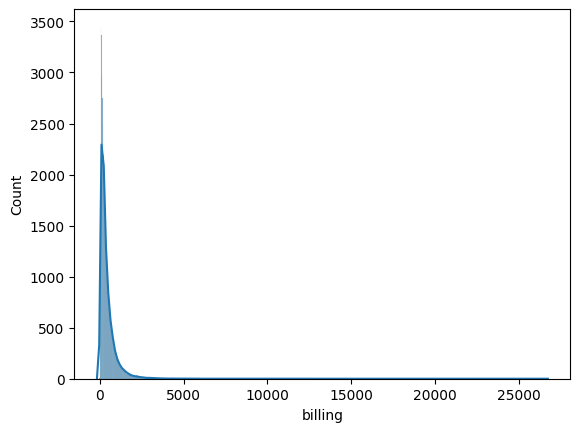

In [18]:
sns.histplot(x= "billing", data = df, kde = True)

## Separo en train y test

In [19]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)
X_train = train_set.drop("billing", axis = 1)
X_test = test_set.drop("billing", axis = 1)
y_train = train_set["billing"]
y_test = test_set["billing"]

In [20]:
rf_reg = RandomForestRegressor(random_state= 42)
xgb_reg = XGBRegressor(random_state = 42)
lgb_reg = LGBMRegressor(random_state = 42, verbose = -100)

### Ejercicio 5

Crea una función a la que se le pase un modelo, un dataset de features y un target asociado a ese dataset y muestre el MAE, MAPE y RMSE del modelo considerando las predicciones contra el dataset de features frente al target

In [21]:
def regression_report(model, X, y):
    y_pred = model.predict(X)
    print("MAE:", mean_absolute_error(y, y_pred))
    print("MAPE:", mean_absolute_percentage_error(y, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
    

In [22]:
rf_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)

LGBMRegressor(random_state=42, verbose=-100)

In [23]:
for nombre,modelo in zip(["RandomForest","XGBoost","LightGBM"],[rf_reg, xgb_reg, lgb_reg]):
    print(f"Report para {nombre}:")
    regression_report(modelo,X_train,y_train)
    print("\n\n")

Report para RandomForest:
MAE: 65.18549879695401
MAPE: 4485797329661280.5
RMSE: 139.24595835430455



Report para XGBoost:
MAE: 165.17064230396926
MAPE: 1.1323269140909306e+16
RMSE: 271.80317258223863



Report para LightGBM:
MAE: 170.31245485661023
MAPE: 1.1227725498269444e+16
RMSE: 325.26151423444276





### Comparativa de Modelos Predictivos

Se ha llevado a cabo una evaluación comparativa de tres modelos de aprendizaje automático: RandomForest, XGBoost y LightGBM. Los resultados de los errores de predicción para cada modelo se presentan a continuación:

#### RandomForest
- **MAE**: 65.1855
- **MAPE**: 4.4858e+15
- **RMSE**: 139.2459

#### XGBoost
- **MAE**: 165.1706
- **MAPE**: 1.1323e+16
- **RMSE**: 271.8032

#### LightGBM
- **MAE**: 170.3125
- **MAPE**: 1.1228e+16
- **RMSE**: 325.2615

### Análisis de Resultados

1. **Mean Absolute Error (MAE)**: El RandomForest presenta el menor MAE, lo que indica que, en promedio, las predicciones de este modelo son las más cercanas a los valores reales.

2. **Mean Absolute Percentage Error (MAPE)**: Los valores extremadamente altos de MAPE en todos los modelos sugieren que hay predicciones con errores porcentuales muy grandes, lo cual podría ser indicativo de valores atípicos o una distribución de datos con una gran variabilidad.

3. **Root Mean Squared Error (RMSE)**: El RandomForest también tiene el RMSE más bajo, lo que refuerza la idea de que este modelo maneja mejor las desviaciones grandes en comparación con XGBoost y LightGBM.

### Próximos Pasos

Para mejorar la precisión y el rendimiento de los modelos, se pueden seguir los siguientes pasos:

1. **Afinar Hiperparámetros**:
   - **RandomForest**: Ajustar el número de árboles (`n_estimators`), la profundidad máxima de los árboles (`max_depth`), y el número mínimo de muestras por hoja (`min_samples_leaf`).
   - **XGBoost**: Ajustar la tasa de aprendizaje (`learning_rate`), la profundidad máxima (`max_depth`), y el parámetro de regularización (`lambda`).
   - **LightGBM**: Optimizar el número de hojas (`num_leaves`), la tasa de aprendizaje (`learning_rate`), y el fraccionamiento de los datos (`feature_fraction`).

2. **Ingeniería de Características**: Crear nuevas características basadas en los datos existentes, eliminar características irrelevantes y transformar características para mejorar su relación con la variable objetivo.

3. **Tratamiento de Valores Atípicos**: Detectar y manejar valores atípicos que podrían estar afectando negativamente la precisión de las predicciones.

4. **Normalización y Escalado**: Asegurarse de que todas las características estén en la misma escala, especialmente para algoritmos sensibles a la escala de los datos.

5. **Validación Cruzada**: Implementar validación cruzada para asegurar que los modelos generalicen bien a nuevos datos y no estén sobreajustados a los datos de entrenamiento.

6. **Ensamblado de Modelos**: Considerar el uso de ensamblados (ensemble) de múltiples modelos para aprovechar las fortalezas de cada uno y obtener predicciones más robustas.

### Conclusión

Los resultados iniciales indican que el modelo RandomForest tiene el mejor desempeño en términos de MAE y RMSE. Sin embargo, se observan valores extremadamente altos de MAPE, lo cual sugiere que hay espacio para mejorar. Los próximos pasos incluyen la optimización de hiperparámetros, mejora en la ingeniería de características y técnicas adicionales para robustecer los modelos. Con estas mejoras, se espera obtener predicciones más precisas y útiles para la toma de decisiones estratégicas.
